<a href="https://colab.research.google.com/github/codholic/multiclass_-classification_Chinese_zodiac_animals/blob/master/Chinese_Zodiac_Animals_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "mahmoudmagdyahmed" # username from the json file
os.environ['KAGGLE_KEY'] = "b00754a21c994729151ae5356b2be3cd" # key from the json file
!kaggle datasets download -d elderyouth/chinese-zodiac-signs # api copied from kaggle

100% 2.07G/2.07G [00:45<00:00, 21.5MB/s]



In [0]:
import torch as torch
import torchvision as torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models

In [0]:
train_transforrm = transforms.Compose([transforms.Resize(255), 
                                       transforms.CenterCrop(224), 
                                       transforms.RandomHorizontalFlip(), 
                                       transforms.RandomRotation(25),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
                                       ])

test_transforrm = transforms.Compose([transforms.Resize(255), 
                                      transforms.CenterCrop(224),  
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
                                      ])

In [0]:
!unzip chinese-zodiac-signs.zip

Archive:  chinese-zodiac-signs.zip
  inflating: signs/test/dog/00000004.jpg  
  inflating: signs/test/dog/00000005.jpg  
  inflating: signs/test/dog/00000010.jpg  
  inflating: signs/test/dog/00000011.jpg  
  inflating: signs/test/dog/00000038.jpg  
  inflating: signs/test/dog/00000039.jpg  
  inflating: signs/test/dog/00000144.jpeg  
  inflating: signs/test/dog/00000164.jpg  
  inflating: signs/test/dog/00000165.jpg  
  inflating: signs/test/dog/00000167.jpg  
  inflating: signs/test/dog/00000170.jpg  
  inflating: signs/test/dog/00000173.jpg  
  inflating: signs/test/dog/00000206.jpg  
  inflating: signs/test/dog/00000207.jpg  
  inflating: signs/test/dog/00000212.jpg  
  inflating: signs/test/dog/00000213.jpg  
  inflating: signs/test/dog/00000359.jpg  
  inflating: signs/test/dog/00000365.jpg  
  inflating: signs/test/dog/00000366.jpg  
  inflating: signs/test/dog/00000371.jpg  
  inflating: signs/test/dog/00000372.jpg  
  inflating: signs/test/dog/00000373.jpg  
  inflating: signs

In [0]:
train_data_set = datasets.ImageFolder('signs/train', transform=train_transforrm)
validation_data_set = datasets.ImageFolder('signs/valid', transform=test_transforrm)
test_data_set = datasets.ImageFolder('signs/test', transform=test_transforrm)

In [0]:
!pip install nonechucks
import nonechucks as nc
train_data_set = nc.SafeDataset(train_data_set)
test_data_set = nc.SafeDataset(test_data_set)
validation_data_set = nc.SafeDataset(validation_data_set)

  Created wheel for nonechucks: filename=nonechucks-0.4.0-cp36-none-any.whl size=11546 sha256=234fff9c3453003cb6b89fdfa06eea52648d735a54956015711716e486a30dcb
  Stored in directory: /root/.cache/pip/wheels/00/b3/4e/4e30d5f934293de9abab2bfe6a4ce6fe77bf936c625133dd9c
Successfully built nonechucks


nonechucks may not work properly with this version of PyTorch (1.3.1). It has only been tested on PyTorch versions 1.0, 1.1, and 1.2


In [0]:
trainloader = torch.utils.data.DataLoader(train_data_set, batch_size=64)
validationloader = torch.utils.data.DataLoader(validation_data_set, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data_set, batch_size=64)
print("trainset_length:", len(train_data_set), ", validationset_length:", len(validation_data_set), ", testset_length:", len(test_data_set))

'''
for images, labels in iter(trainloader):
  images = images.numpy()
  for im in images:
    #im = PIL.Image.open(fn)
    if im.mode != 'RGB': im.convert('RGB').save(fn)   
'''

trainset_length: 7197 , validationset_length: 650 , testset_length: 660


"\nfor images, labels in iter(trainloader):\n  images = images.numpy()\n  for im in images:\n    #im = PIL.Image.open(fn)\n    if im.mode != 'RGB': im.convert('RGB').save(fn)   \n"

In [0]:
# specify the image classes
classes_names = ['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 'ratt', 'rooster', 'snake', 'tiger']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

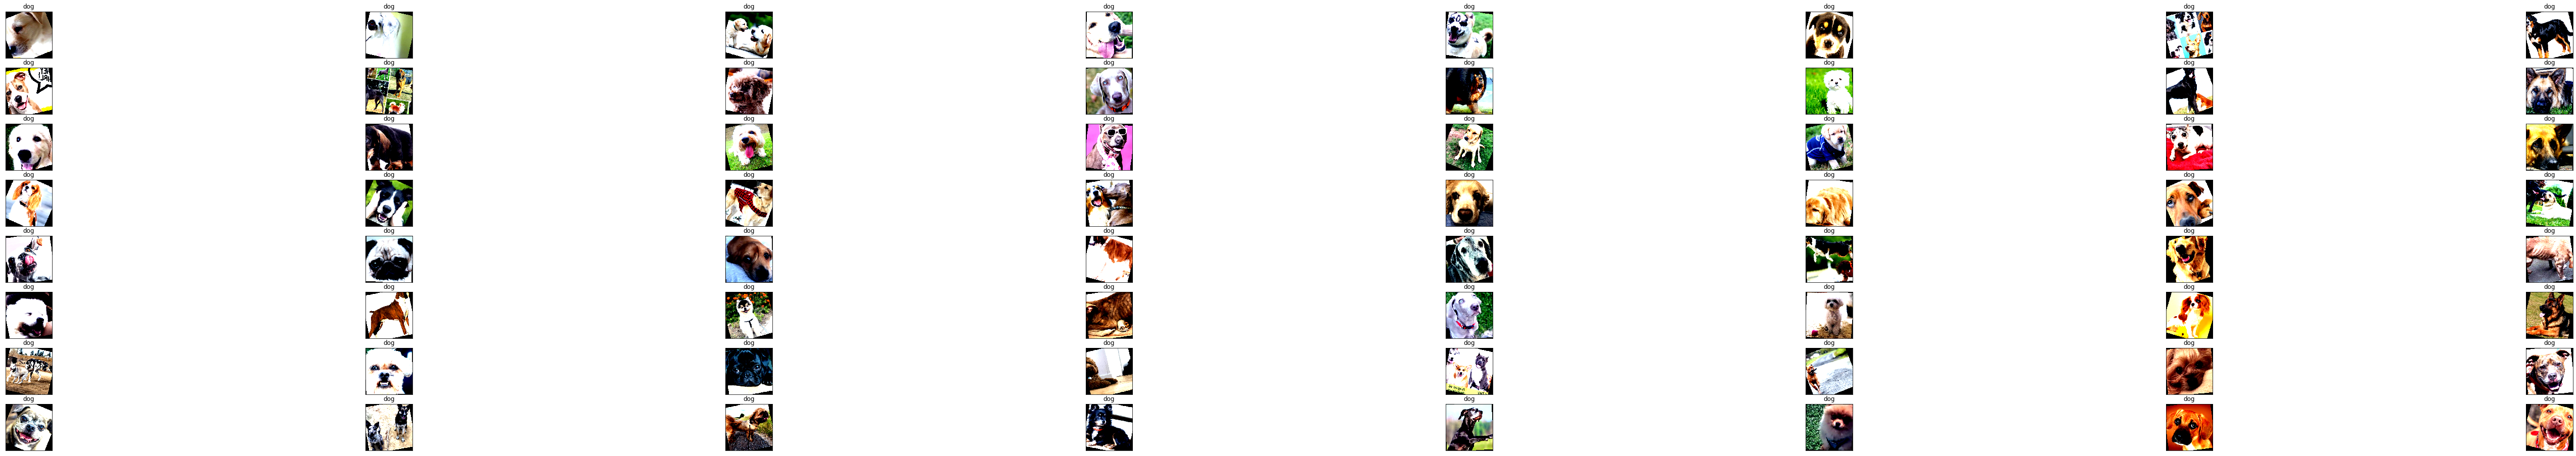

In [0]:
# not written by me
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display
print(len(images))

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(8, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes_names[labels[idx]])    

In [0]:

#network = models.resnext101_32x8d(pretrained=True)
network = models.resnet152(pretrained=True)
print(network)
'''

from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as f

od = OrderedDict() 
od['first_conv_layer'] = nn.Conv2d(3, 10, 3, padding=1)
od['first_conv_activation'] = nn.ReLU()
od['first_maxpool'] = nn.MaxPool2d(2, 2)
od['second_conv_layer'] = nn.Conv2d(10, 20, 3, padding=1)
od['second_conv_activation'] = nn.ReLU()
od['second_maxpool'] = nn.MaxPool2d(2, 2)
od['third_conv_layer'] = nn.Conv2d(20, 40, 3)
od['third_conv_activation'] = nn.ReLU()
od['third_maxpool'] = nn.MaxPool2d(2, 2)
od['flattening'] = nn.Flatten()
#od['first_fc_layer'] = nn.Linear(40*3*3, 180)
od['first_fc_layer'] = nn.Linear(29160, 5000)
od['first_fc_activation'] = nn.ReLU()
od['first_dropout'] = nn.Dropout(p=0.3)
od['second_fc_layer'] = nn.Linear(5000, 512)
od['second_fc_activation'] = nn.ReLU()
od['second_dropout'] = nn.Dropout(p=0.3)
od['last_layer'] = nn.Linear(512, 12)
od['softmax'] = nn.LogSoftmax(dim=1)

network = nn.Sequential(od)
'''
print(network)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:02<00:00, 105MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:

# to avoid recalculations again
for param in network.parameters():
  param.requires_grad=False
 

In [0]:

# write a new classifier, to get tweleve outputs only
from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as f

od = OrderedDict() 
od['in'] = nn.Linear(2048, 256)
od['a1'] = nn.ReLU()
od['d1'] = nn.Dropout(0.35)
od['l1'] = nn.Linear(256, 64)
od['a2'] = nn.ReLU()
od['d2'] = nn.Dropout(0.35)
od['l2'] = nn.Linear(64, 12)
od['softmax'] = nn.LogSoftmax(dim=1)

new_classifier = nn.Sequential(od)
for param in new_classifier.parameters():
  param.requires_grad=True

# set the new classifier
network.fc = new_classifier
print(network)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
import torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print(torch.cuda.is_available())
!nvcc --version
!nvidia-smi

network.to('cuda')

Torch 1.3.1 CUDA 10.1.243
True
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130
Sat Jan 18 12:54:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
import torch.optim as optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

In [0]:
epoch = 10
min_validation_loss = float('inf')
train_losses, validation_losses = [], []
for i in range(epoch):
    train_loss = 0
    itr_counter = 0
    for images, labels in iter(trainloader):
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        logits = network(images)
        loss = criterion(logits, labels)    
        train_loss += loss.item() 
        loss.backward()
        optimizer.step()
        itr_counter += 1
    else:
        avg_train_loss = train_loss / itr_counter
        train_losses.append(avg_train_loss)
        
        itr_counter = 0
        accuracy = 0
        validation_loss = 0
        with torch.no_grad():
          network.eval()
          for images, labels in iter(validationloader):
            images, labels = images.to('cuda'), labels.to('cuda')
            logits = network(images)
            loss = criterion(logits, labels)    
            validation_loss += loss.item()
            ps = torch.exp(logits)
            probablities, classes = ps.topk(1)
            equals = (classes == labels.reshape(*classes.shape))
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            itr_counter += 1
          else:
            avg_validation_loss = validation_loss / itr_counter
            validation_losses.append(avg_validation_loss)
            accuracy = accuracy / itr_counter
            print("epoch #",i, ", train_loss: ", avg_train_loss, ", validation_loss: ", avg_validation_loss,  ", Accuracy: ", accuracy.item()*100,"%")
            if avg_validation_loss < min_validation_loss:
              print("min_validation_loss update:", min_validation_loss, "-->", avg_validation_loss)
              min_validation_loss = avg_validation_loss
              torch.save(network.state_dict(), 'Chinese_Zodiac_signs_classification_model.pth')
            network.train()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch # 0 , train_loss:  2.5917846565093616 , validation_loss:  2.515332265333696 , Accuracy:  7.670454680919647 %
min_validation_loss update: inf --> 2.515332265333696
epoch # 1 , train_loss:  2.7509276297240133 , validation_loss:  2.4989705085754395 , Accuracy:  7.670454680919647 %
min_validation_loss update: 2.515332265333696 --> 2.4989705085754395
epoch # 2 , train_loss:  2.7460771683043084 , validation_loss:  2.501817746595903 , Accuracy:  7.670454680919647 %
epoch # 3 , train_loss:  2.7496188383186815 , validation_loss:  2.5032076185399834 , Accuracy:  7.670454680919647 %
epoch # 4 , train_loss:  2.7510206530579424 , validation_loss:  2.5037711316888984 , Accuracy:  7.670454680919647 %
epoch # 5 , train_loss:  2.7515351835605317 , validation_loss:  2.5039738741788 , Accuracy:  7.670454680919647 %
epoch # 6 , train_loss:  2.7517193038906673 , validation_loss:  2.5040585561232134 , Accuracy:  7.670454680919647 %
epoch # 7 , train_loss:  2.751795161086901 , validation_loss:  2.50406

In [0]:
saved_state_dict = torch.load('Chinese_Zodiac_signs_classification_model.pth')
network.load_state_dict(saved_state_dict)
itr_counter = 0
accuracy = 0
test_loss = 0
with torch.no_grad():
  network.eval()
  for images, labels in iter(testloader):
    images, labels = images.to('cuda'), labels.to('cuda')
    logits = network(images)
    loss = criterion(logits, labels)    
    test_loss += loss.item()
    ps = torch.exp(logits)
    probablities, classes = ps.topk(1)
    equals = (classes == labels.reshape(*classes.shape))
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    itr_counter += 1
  else:
    avg_test_loss = test_loss / itr_counter
    accuracy = accuracy / itr_counter
    print("Accuracy on TestSet: ", accuracy.item()*100,"%")
    network.train()

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Accuracy on TestSet:  7.954545319080353 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


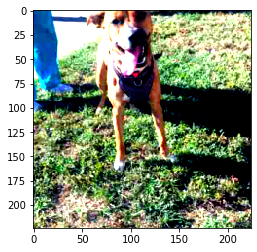

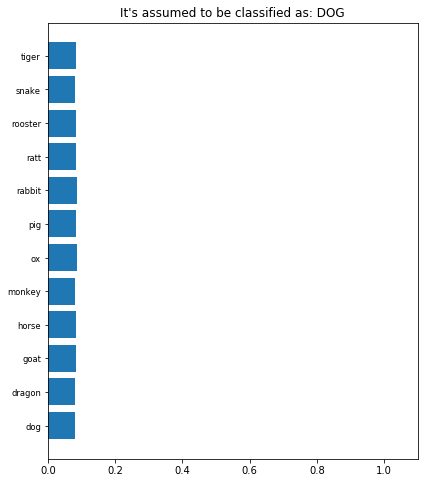

In [0]:
def view_classify(img, ps,  label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    img = img.to('cpu')
    ps = ps.to('cpu')
    label = label.to('cpu')
    ps = ps.data.numpy().squeeze()

    fig, (ax2) = plt.subplots(figsize=(6,9), ncols=1)
    
    ax2.barh(np.arange(12), ps)
    ax2.set_aspect(0.1) 
    ax2.set_yticks(np.arange(12)) 
    ax2.set_yticklabels(['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 'ratt', 'rooster', 'snake', 'tiger'], size='small');                      
    ax2.set_title("It's assumed to be classified as: " + classes_names[label.item()].upper())
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


##
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to('cuda'), labels.to('cuda')
images_length = len(images)
idx = np.random.randint(low=0, high=images_length)
img = images[idx]
label = labels[idx]
ps = f.softmax(network(images), dim=1)
imshow(img.to('cpu'))
view_classify(img, ps[idx],  label)    